# Planted Noisy kXOR - Kikuchi Guiding State

Prepare the guiding state for a kXOR instance $\mathcal{I}$ with
Kikuchi parameter $\ell$.

References:
    [Quartic quantum speedups for planted inference](https://arxiv.org/abs/2406.19378v1)
    Section 4.4.1, Theorem 4.15.

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `SimpleGuidingState`
Prepare the guiding state for $\ell = k$.

Given an kXOR instance $\mathcal{I}$, prepare the guiding state for
parameter $\ell = k$ (i.e. $c = 1$), defined in Eq 134:
    $$
    |\phi\rangle
    \propto
    |\Gamma^k(\mathcal{A})\rangle
    =
    \frac{1}{\sqrt{\tilde{m}}}
    \sum_{S \in {[n] \choose k}} B_\mathcal{I}(S) |S\rangle
    $$

Here, $\tilde{m}$ is the number of constraints in the input instance $\mathcal{I}$,
and $\mathcal{A} = \sqrt{\frac{{n\choose k}}{\tilde{m}}} \mathcal{I}$.

This bloq has a gate cost of $O(\tilde{m} \log n)$ (see Eq 142 and paragraph below).

#### Parameters
 - `inst`: the kXOR instance $\mathcal{I}$.
 - `eps`: Precision of the prepared state (defaults to 1e-6). 

#### Registers
 - `S`: a scope of $k$ variables, each in $[n]$. 

#### References
 - [Quartic quantum speedups for planted inference](https://arxiv.org/abs/2406.19378v1). Equation 134.


In [2]:
from qualtran.bloqs.optimization.k_xor_sat import SimpleGuidingState

### Example Instances

In [3]:
import sympy

from qualtran.bloqs.optimization.k_xor_sat import KXorInstance

n, m, k = sympy.symbols("n m k", positive=True, integer=True)
inst = KXorInstance.symbolic(n=n, m=m, k=k)
simple_guiding_state_symb = SimpleGuidingState(inst)

In [4]:
from qualtran.bloqs.optimization.k_xor_sat import Constraint, KXorInstance

inst = KXorInstance(
    n=4,
    k=2,
    constraints=(
        Constraint(S=(0, 1), b=1),
        Constraint(S=(2, 3), b=-1),
        Constraint(S=(1, 2), b=1),
    ),
)
simple_guiding_state = SimpleGuidingState(inst)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([simple_guiding_state_symb, simple_guiding_state],
           ['`simple_guiding_state_symb`', '`simple_guiding_state`'])

### Call Graph

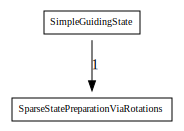

#### Counts totals:
 - `SparseStatePreparationViaRotations`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
simple_guiding_state_symb_g, simple_guiding_state_symb_sigma = simple_guiding_state_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(simple_guiding_state_symb_g)
show_counts_sigma(simple_guiding_state_symb_sigma)

## `GuidingState`
Prepare a guiding state for a kXOR instance with parameter $\ell$.

Given an kXOR instance $\mathcal{I}$, and parameter $\ell$ (a multiple of $k$),
we want to prepare the unit-length guiding state $|\mathbb{\Psi}\rangle$ (Eq 135):

    $$
    |\mathbb{\Psi}\rangle
    \propto
    |\Gamma^\ell(\mathcal{A})\rangle
    \propto
    \sum_{T \in {[n] \choose \ell}}
    \sum_{\{S_1, \ldots, S_c\} \in \text{Part}_k(T)}
    \left(
    \prod_{j = 1}^c B_{\mathcal{I}}(S)
    \right)
    |T\rangle
    $$

This bloq prepares the state (Eq 136):
    $$ \beta |\mathbb{\Psi}\rangle |0^{\ell \log \ell + 3}\rangle
       + |\perp\rangle |1\rangle
    $$
where $\beta \ge \Omega(1 / \ell^{\ell/2})$,
and $\tilde{m}$ is the number of constraints in $\mathcal{I}$.

This has a gate cost of $O(\ell \tilde{m} \log n)$.

#### Parameters
 - `inst`: the kXOR instance $\mathcal{I}$.
 - `ell`: the Kikuchi parameter $\ell$.
 - `amplitude_good_part`: (optional) the amplitude $\beta$ of the guiding state $|\Psi\rangle$ Defaults to $\beta = 0.99 / \ell^{\ell/2}$.
 - `eps`: Precision of the prepared state (defaults to 1e-6). 

#### Registers
 - `T`: $\ell$ indices each in $[n]$.
 - `ancilla`: (entangled) $\ell\log\ell+3$ ancilla qubits used for state preparation. The all zeros state of the ancilla is the good subspace. 

#### References
 - [Quartic quantum speedups for planted inference](https://arxiv.org/abs/2406.19378v1). Section 4.4.1 "Preparing the guiding state", Theorem 4.15. Eq 136.


In [7]:
from qualtran.bloqs.optimization.k_xor_sat import GuidingState

### Example Instances

In [8]:
import sympy

from qualtran.bloqs.optimization.k_xor_sat import KXorInstance

n, m, c = sympy.symbols("n m c", positive=True, integer=True)
k = sympy.symbols("k", positive=True, integer=True, even=True)
inst = KXorInstance.symbolic(n=n, m=m, k=k)
guiding_state_symb_c = GuidingState(inst, ell=c * k)

In [9]:
import sympy

from qualtran.bloqs.optimization.k_xor_sat import KXorInstance

n, m, k = sympy.symbols("n m k", positive=True, integer=True)
inst = KXorInstance.symbolic(n=n, m=m, k=k)
c = 2
guiding_state_symb = GuidingState(inst, ell=c * inst.k)

In [10]:
from qualtran.bloqs.optimization.k_xor_sat import Constraint, KXorInstance

inst = KXorInstance(
    n=4,
    k=2,
    constraints=(
        Constraint(S=(0, 1), b=1),
        Constraint(S=(2, 3), b=-1),
        Constraint(S=(1, 2), b=1),
    ),
)
guiding_state = GuidingState(inst, ell=4)

#### Graphical Signature

In [11]:
from qualtran.drawing import show_bloqs
show_bloqs([guiding_state_symb_c, guiding_state_symb, guiding_state],
           ['`guiding_state_symb_c`', '`guiding_state_symb`', '`guiding_state`'])

### Call Graph

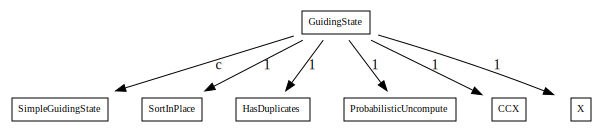

#### Counts totals:
 - `CCX`: 1
 - `HasDuplicates`: 1
 - `ProbabilisticUncompute`: 1
 - `SimpleGuidingState`: $\displaystyle c$
 - `SortInPlace`: 1
 - `X`: 1

In [12]:
from qualtran.resource_counting.generalizers import ignore_split_join
guiding_state_symb_c_g, guiding_state_symb_c_sigma = guiding_state_symb_c.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(guiding_state_symb_c_g)
show_counts_sigma(guiding_state_symb_c_sigma)